Hour                                       0
Immobilized_bus                            0
Broken_Truck                               0
Vehicle_excess                             0
Accident_victim                            2
Running_over                             139
Fire_vehicles                              1
Occurrence_involving_freight               0
Incident_involving_dangerous_freight       2
Lack_of_electricity                        0
Fire                                       0
Point_of_flooding                          0
Manifestations                             1
Defect_in_the_network_of_trolleybuses      2
Tree_on_the_road                           0
Semaphore_off                              1
Intermittent_Semaphore                     0
Slowness_in_traffic_percent                0
dtype: int64
no of records -  (140, 18)
   Hour  Immobilized_bus  Broken_Truck  Vehicle_excess  Accident_victim  \
0     1              0.0           0.0               1              0.0   


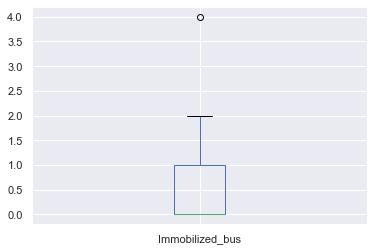

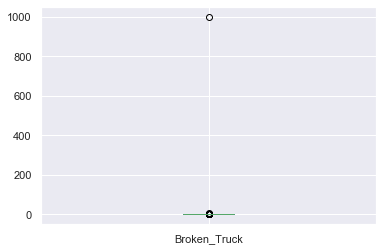

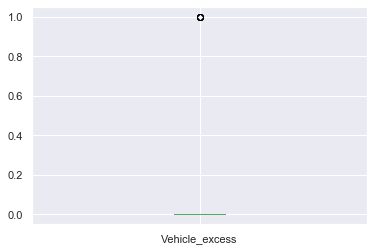

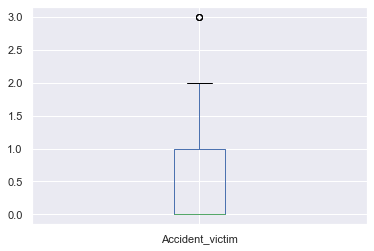

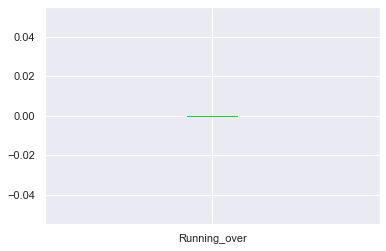

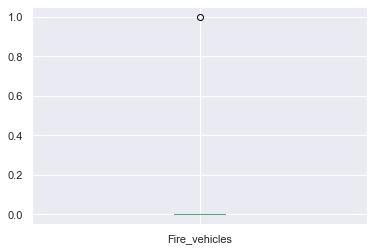

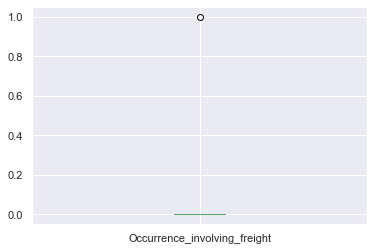

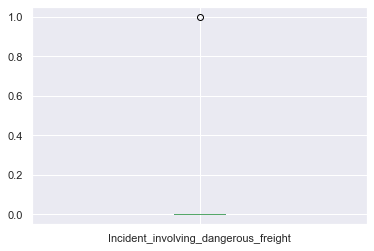

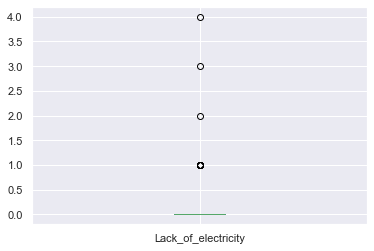

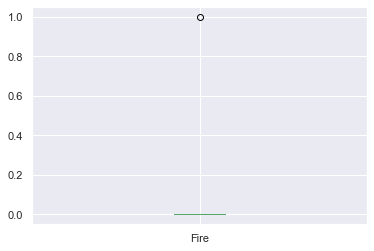

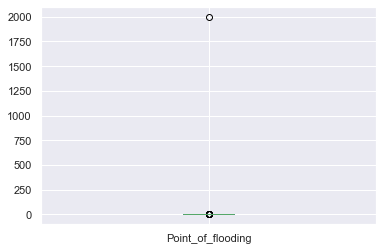

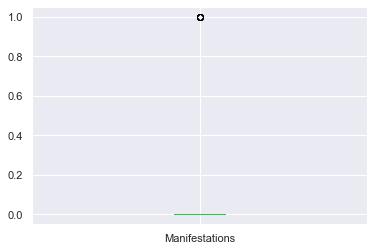

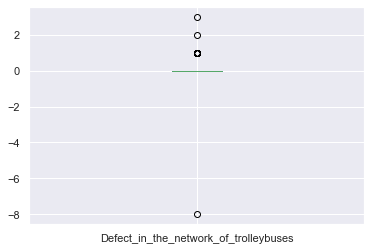

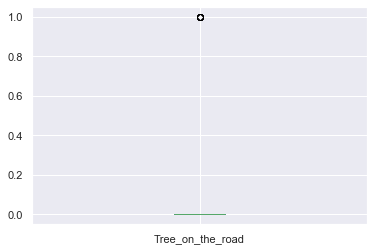

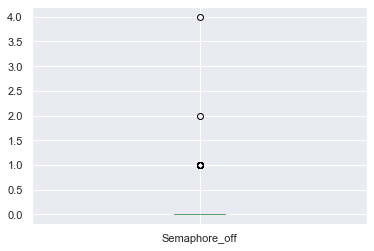

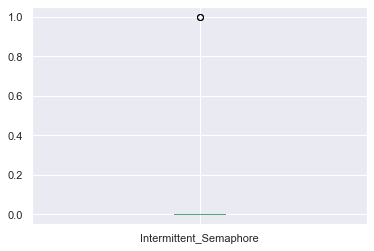

<Figure size 432x288 with 0 Axes>

In [21]:
from scipy.io import arff
import math
import pandas as pd
import sys, getopt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
%matplotlib inline
# Step 1 -  . Convert to csv and load data 

def arff2csv(arff_path, csv_path=None, _encoding='utf8'):
    with open(arff_path, 'r', encoding=_encoding) as fr:
        attributes = []
        if csv_path is None:
            csv_path = arff_path[:-4] + 'csv'  # *.arff -> *.csv
        write_sw = False
        with open(csv_path, 'w', encoding=_encoding) as fw:
            for line in fr.readlines():
                if write_sw:
                    fw.write(line)
                elif '@data' in line:
                    fw.write(','.join(attributes) + '\n')
                    write_sw = True
                elif '@attribute' in line:
                    attributes.append(line.split()[1])  # @attribute attribute_tag numeric
    print("Convert {} to {}.".format(arff_path, csv_path))

#arff2csv('data - original.arff', 'data - original.csv')


#data = arff.loadarff('data - original.arff')
#df = pd.DataFrame(data[0])
pd.set_option('display.max_columns', None)
missing_values = ["n/a", "na", "-1", " ", ""]
df = pd.read_csv('data - original.csv', na_values = missing_values);


# Step 1.1 data transformation
#Replace T /TRUE  with 1 , F.FALSE with 0

#df = df.replace(to_replace = 'T', value = 1)
#df = df.replace(to_replace = 'F', value = 0)


df['Fire_vehicles'] = df['Fire_vehicles'].map({'YES': 1, 'NO': 0});
df['Vehicle_excess'] = df['Vehicle_excess'].map({'T': 1, 'F': 0,'t': 1, 'f': 0,'NO': 0, 'YES': 1  })
df['Running_over'] = df['Running_over'].map({'NO': 0, 'YES': 1})
df['Hour'] = df['Hour'].map({'7:00':1,'7:30':2,'8:00':3,'8:30':4,'9:00':5,'9:30':6,'10:00':7,'10:30':8,'11:00':9,'11:30':10,'12:00':11,'12:30':12,'13:00':13,'13:30':14,'14:00':15,
                             '14:30':16,'15:00':17,'15:30':18,'15:30':19,'16:00':20,'16:30':21,'17:00':22,'17:30':23,'18:00':24,
                             '18:30':25,'19:00':26,'19:30':27,'20:00':28})


# Step 2 -  Finding Missing values 
#print(df.describe())
print(df.isnull().sum())
print('no of records - ', df.shape)
print(df.head())

#df.isnull().mean()

#Step 3  - visualize distrubution for columsn which have missing data  

#Step 4   - Impute missing values

#Replace missing values in Accident_Victim with mean
print ('floor of mean of accident_victim  ',math.floor(df['Accident_victim'].mean()))
       
df['Accident_victim'].fillna(math.floor(df['Accident_victim'].mean()), inplace=True)
df['Vehicle_excess'].fillna(0,inplace=True);
df['Running_over'].fillna(0,inplace=True);
df['Fire_vehicles'].fillna(0,inplace=True);
df['Incident_involving_dangerous_freight'].fillna(0,inplace=True);
df['Manifestations'].fillna(0,inplace=True);
df['Defect_in_the_network_of_trolleybuses'].fillna(0,inplace=True);
df['Semaphore_off'].fillna(0,inplace=True);

print(df.isnull().sum())
print(df.info())

#Step 5 check outliers

boxplot = df.boxplot(column=['Immobilized_bus'])
plt.figure()
boxplot = df.boxplot(column=['Broken_Truck'])
plt.figure()
boxplot = df.boxplot(column=['Vehicle_excess'])
plt.figure()
oxplot = df.boxplot(column=['Accident_victim'])
plt.figure()
boxplot = df.boxplot(column=['Running_over'])
plt.figure()
boxplot = df.boxplot(column=['Fire_vehicles'])
plt.figure()
boxplot = df.boxplot(column=['Occurrence_involving_freight'])
plt.figure()
boxplot = df.boxplot(column=['Incident_involving_dangerous_freight'])
plt.figure()
boxplot = df.boxplot(column=['Lack_of_electricity'])
plt.figure()
boxplot = df.boxplot(column=['Fire'])
plt.figure()
boxplot = df.boxplot(column=['Point_of_flooding'])
plt.figure()
boxplot = df.boxplot(column=['Manifestations'])
plt.figure()
boxplot = df.boxplot(column=['Defect_in_the_network_of_trolleybuses'])
plt.figure()
boxplot = df.boxplot(column=['Tree_on_the_road'])
plt.figure()
boxplot = df.boxplot(column=['Semaphore_off'])
plt.figure()
boxplot = df.boxplot(column=['Intermittent_Semaphore'])
plt.figure()

#Step - remove outlier value 
df = df[df.Broken_Truck < 1000]
df = df[df.Point_of_flooding < 2000]
print (df.info())

#Step - Feature Selection
# Splitting the data into train and 
X = df.drop(['Slowness_in_traffic_percent'],axis=1)
# Putting response variable to y
y = df['Slowness_in_traffic_percent']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

#Step - Model building

